Import Library

In [1]:
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Load Dataset

In [2]:
url = 'Ulasan_LivinbyMandiri.csv'
app_reviews_df = pd.read_csv(url)

app_reviews_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1e5a576a-149e-4002-a66a-f16aebae9900,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Buka rekening Mandiri lewat aplikasi ini katan...,1,579,3.1.0,2025-08-31 05:41:33,"Hi Sahabat @Triana Wulandari Yueliang85, mohon...",2025-08-31 05:59:19,3.1.0
1,4bd721f2-8652-4b69-b8ce-aac2be476891,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,livin sekarang tidak support jika setting akse...,1,394,3.1.0,2025-09-09 12:08:00,"Halo Sahabat @Izzy F., mohon maaf atas ketidak...",2025-09-09 12:11:14,3.1.0
2,6452d916-c1de-4808-bf02-dffcb21bba2e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"mau login , harus masukkan nomor kartu debit !...",1,346,3.1.0,2025-09-12 09:57:06,"Hai Sahabat @Erwindo Setyawan, mohon maaf atas...",2025-09-12 10:40:08,3.1.0
3,f0286054-5577-4cc3-bc9c-cd143e50695e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"buat buka aja susah amat,, lama bgt loading ny...",1,130,3.1.0,2025-10-03 16:38:06,"Hai Sahabat @Deonn Oblet, mohon maaf atas keti...",2025-10-03 16:43:17,3.1.0
4,e6d00fef-4724-4778-aa85-e2b0a78eed4f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ini kenapa Livin nya GK bsa dibuka...tiap buka...,2,3,3.1.0,2025-10-20 00:10:08,"Halo Sahabat @DANIA NANDA, mohon maaf atas ket...",2025-10-20 00:11:59,3.1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,a50461e0-090e-414e-b686-1b745ab61617,Ahmad 88,https://play-lh.googleusercontent.com/a-/ALV-U...,Bungga deposito mandiri kecil bangat jauh lebi...,2,0,1.6.0,2023-10-30 06:05:57,"Halo Sahabat @Ahmad 88, mohon maaf atas ketida...",2023-10-30 06:36:52,1.6.0
9996,c8881e9b-7e6c-4d29-af37-466b1dfc575c,Prengki Wildanattaqi,https://play-lh.googleusercontent.com/a/ACg8oc...,Upgrade uda 2 hari gx bisa2..ja5Ingan bagus..b...,1,0,1.0.2,2022-07-07 18:50:55,"Halo Bpk Prengki, mohon maaf atas ketidaknyama...",2022-07-06 18:20:23,1.0.2
9997,1c35fbbb-5de2-4db2-a68f-5e4ff149974a,Fandy Nteu,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi taik, tidak jelas aktivasinya, sudah ...",1,0,1.3.0,2023-04-22 16:49:02,"Halo Bpk Fandy, mohon maaf atas ketidaknyamana...",2023-04-22 16:55:14,1.3.0
9998,01b9c30d-30ab-4487-97fd-32edf0dc58e1,Noir F,https://play-lh.googleusercontent.com/a-/ALV-U...,"Ini livin ngapain ya, kok cek pengaturan jam o...",1,1,1.1.0,2022-06-15 15:22:54,Hai Bpk Noir. Mohon maaf atas ketidaknyamanann...,2022-06-15 20:36:55,1.1.0


In [3]:
app_reviews_df.shape

(10000, 11)

In [4]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1e5a576a-149e-4002-a66a-f16aebae9900,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Buka rekening Mandiri lewat aplikasi ini katan...,1,579,3.1.0,2025-08-31 05:41:33,"Hi Sahabat @Triana Wulandari Yueliang85, mohon...",2025-08-31 05:59:19,3.1.0
1,4bd721f2-8652-4b69-b8ce-aac2be476891,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,livin sekarang tidak support jika setting akse...,1,394,3.1.0,2025-09-09 12:08:00,"Halo Sahabat @Izzy F., mohon maaf atas ketidak...",2025-09-09 12:11:14,3.1.0
2,6452d916-c1de-4808-bf02-dffcb21bba2e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"mau login , harus masukkan nomor kartu debit !...",1,346,3.1.0,2025-09-12 09:57:06,"Hai Sahabat @Erwindo Setyawan, mohon maaf atas...",2025-09-12 10:40:08,3.1.0
3,f0286054-5577-4cc3-bc9c-cd143e50695e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"buat buka aja susah amat,, lama bgt loading ny...",1,130,3.1.0,2025-10-03 16:38:06,"Hai Sahabat @Deonn Oblet, mohon maaf atas keti...",2025-10-03 16:43:17,3.1.0
4,e6d00fef-4724-4778-aa85-e2b0a78eed4f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ini kenapa Livin nya GK bsa dibuka...tiap buka...,2,3,3.1.0,2025-10-20 00:10:08,"Halo Sahabat @DANIA NANDA, mohon maaf atas ket...",2025-10-20 00:11:59,3.1.0


In [5]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  8734 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          9794 non-null   object
 9   repliedAt             9794 non-null   object
 10  appVersion            8734 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


Preprocessing

In [6]:
clean_df = app_reviews_df.dropna()

In [7]:
clean_df = clean_df.drop_duplicates()
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [8]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [9]:
# Slang Words
kamus_slang = pd.read_excel('kamuskatabaku.xlsx')
slang_dict = dict(zip(kamus_slang['tidak_baku'], kamus_slang['kata_baku']))

def fix_slangwords(teks):
    return ' '.join([slang_dict.get(kata, kata) for kata in teks.split()])

In [10]:
import nltk
nltk.download('punkt_tab')

clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [11]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,1e5a576a-149e-4002-a66a-f16aebae9900,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Buka rekening Mandiri lewat aplikasi ini katan...,1,579,3.1.0,2025-08-31 05:41:33,"Hi Sahabat @Triana Wulandari Yueliang85, mohon...",2025-08-31 05:59:19,3.1.0,Buka rekening Mandiri lewat aplikasi ini katan...,buka rekening mandiri lewat aplikasi ini katan...,buka rekening mandiri lewat aplikasi ini katan...,"[buka, rekening, mandiri, lewat, aplikasi, ini...","[buka, rekening, mandiri, aplikasi, gagal, inf...",buka rekening mandiri aplikasi gagal infonya p...
1,4bd721f2-8652-4b69-b8ce-aac2be476891,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,livin sekarang tidak support jika setting akse...,1,394,3.1.0,2025-09-09 12:08:00,"Halo Sahabat @Izzy F., mohon maaf atas ketidak...",2025-09-09 12:11:14,3.1.0,livin sekarang tidak support jika setting akse...,livin sekarang tidak support jika setting akse...,livin sekarang tidak support jika setting akse...,"[livin, sekarang, tidak, support, jika, settin...","[livin, support, setting, aksesbilitas, menyal...",livin support setting aksesbilitas menyala men...
2,6452d916-c1de-4808-bf02-dffcb21bba2e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"mau login , harus masukkan nomor kartu debit !...",1,346,3.1.0,2025-09-12 09:57:06,"Hai Sahabat @Erwindo Setyawan, mohon maaf atas...",2025-09-12 10:40:08,3.1.0,mau login harus masukkan nomor kartu debit J...,mau login harus masukkan nomor kartu debit j...,mau login harus masukkan nomor kartu debit jik...,"[mau, login, harus, masukkan, nomor, kartu, de...","[login, masukkan, nomor, kartu, debit, kartu, ...",login masukkan nomor kartu debit kartu debit s...
3,f0286054-5577-4cc3-bc9c-cd143e50695e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"buat buka aja susah amat,, lama bgt loading ny...",1,130,3.1.0,2025-10-03 16:38:06,"Hai Sahabat @Deonn Oblet, mohon maaf atas keti...",2025-10-03 16:43:17,3.1.0,buat buka aja susah amat lama bgt loading nya ...,buat buka aja susah amat lama bgt loading nya ...,buat buka saja susah amat lama banget loading ...,"[buat, buka, saja, susah, amat, lama, banget, ...","[buka, susah, banget, loading, ujug, aplikasi,...",buka susah banget loading ujug aplikasi aplika...
4,e6d00fef-4724-4778-aa85-e2b0a78eed4f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ini kenapa Livin nya GK bsa dibuka...tiap buka...,2,3,3.1.0,2025-10-20 00:10:08,"Halo Sahabat @DANIA NANDA, mohon maaf atas ket...",2025-10-20 00:11:59,3.1.0,ini kenapa Livin nya GK bsa dibukatiap buka ap...,ini kenapa livin nya gk bsa dibukatiap buka ap...,ini kenapa livin ya tidak bisa dibukatiap buka...,"[ini, kenapa, livin, ya, tidak, bisa, dibukati...","[livin, dibukatiap, buka, aplikasinya, muncul,...",livin dibukatiap buka aplikasinya muncul tulis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,a50461e0-090e-414e-b686-1b745ab61617,Ahmad 88,https://play-lh.googleusercontent.com/a-/ALV-U...,Bungga deposito mandiri kecil bangat jauh lebi...,2,0,1.6.0,2023-10-30 06:05:57,"Halo Sahabat @Ahmad 88, mohon maaf atas ketida...",2023-10-30 06:36:52,1.6.0,Bungga deposito mandiri kecil bangat jauh lebi...,bungga deposito mandiri kecil bangat jauh lebi...,bungga deposito mandiri kecil banget jauh lebi...,"[bungga, deposito, mandiri, kecil, banget, jau...","[bungga, deposito, mandiri, banget, covid, gil...",bungga deposito mandiri banget covid giliran p...
9996,c8881e9b-7e6c-4d29-af37-466b1dfc575c,Prengki Wildanattaqi,https://play-lh.googleusercontent.com/a/ACg8oc...,Upgrade uda 2 hari gx bisa2..ja5Ingan bagus..b...,1,0,1.0.2,2022-07-07 18:50:55,"Halo Bpk Prengki, mohon maaf atas ketidaknyama...",2022-07-06 18:20:23,1.0.2,Upgrade uda hari gx bisajaIngan bagusbuka m

Perlabelan

In [12]:
import csv
import requests
from io import StringIO

lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [13]:
def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [14]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    5460
positive    2564
neutral      533
Name: count, dtype: int64


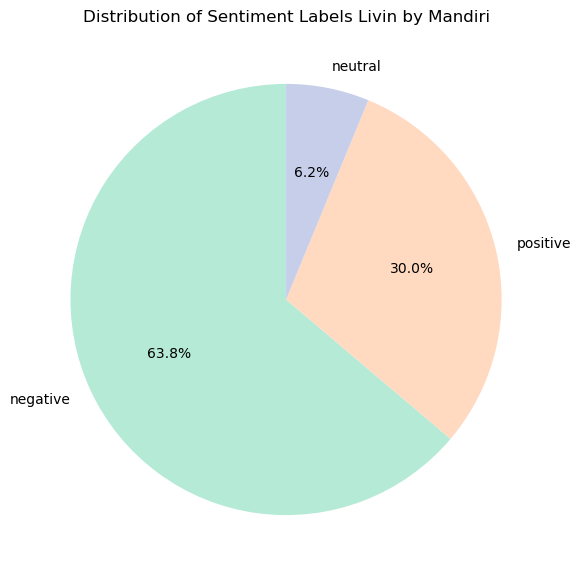

In [15]:
label_counts = clean_df['polarity'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#B5EAD7', '#FFDAC1', '#C7CEEA']
)

plt.title('Distribution of Sentiment Labels Livin by Mandiri')
plt.show()


Ekstraksi Fitur

In [16]:
X = clean_df['text_akhir']
y = clean_df['polarity'] 

In [17]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df

,admin,akses,akun,aman,aneh,apapun,apk,aplikasi,aplikasinya,app,...,uninstall,update,upgrade,user,verifikasi,versi,via,wajah,warna,wifi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.229715,0.190535,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.316066,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.297764,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.266143,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.224367,0.372198,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8552,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.205778,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8553,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.870489,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8554,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.220328,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8555,0.0,0.0,0.0,0.0,0.0,0.0,0.281929,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


SMOTE

In [18]:
from imblearn.over_sampling import SMOTE

tfidf_vectorizer = TfidfVectorizer()
X = X.fillna('')
y = y.loc[X.index]
X_tfidf = tfidf_vectorizer.fit_transform(X)

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_tfidf, y)

Model

In [19]:
# Random Forest (80/20)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size=0.2,random_state=40)
 
random_forest = RandomForestClassifier()
random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.9313186813186813


In [20]:
# Random Forest (85/15)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size=0.15,random_state=40)
 
random_forest = RandomForestClassifier()
random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.9312169312169312


In [ ]:
# Logistic Regression (85/15)
from sklearn.linear_model import LogisticRegression
X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size=0.15,random_state=40)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train.toarray(), y_train)

y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9600660777131366
Logistic Regression - accuracy_test: 0.9251119251119251
